주식예측 프로젝트

In [ ]:
# open 시가
# high 고가
# low 저가
# close 종가
# volume 거래량
# Adj Close 주식의 분할, 배당, 배분 등을 고려해 조정한 종가

In [ ]:
# tensorflow 
import tensorflow as tf
# keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.utils import np_utils
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("009150.KS.csv")#삼성SDI 주가
data1 = pd.read_csv("000660.KS (1).csv")#하이닉스 주가

In [ ]:
data.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-24,51400.0,53100.0,50500.0,51500.0,49681.527344,518793.0
1,2015-08-25,52400.0,54900.0,51000.0,54000.0,52093.250000,587515.0
2,2015-08-26,54200.0,56600.0,53600.0,56300.0,54312.031250,530657.0
3,2015-08-27,57200.0,57600.0,55700.0,56300.0,54312.031250,567310.0
4,2015-08-28,57300.0,59500.0,57000.0,58900.0,56820.226563,865622.0
5,2015-08-31,59600.0,61000.0,58900.0,60700.0,58556.671875,979552.0
6,2015-09-01,60800.0,61400.0,60000.0,61000.0,58846.082031,659273.0


In [ ]:
data1.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-24,31600.0,32350.0,30300.0,31050.0,28996.462891,8593829.0
1,2015-08-25,31300.0,33950.0,31300.0,33500.0,31284.429688,11821629.0
2,2015-08-26,33500.0,34200.0,32850.0,33450.0,31237.736328,6534943.0
3,2015-08-27,34200.0,35500.0,34150.0,35500.0,33152.152344,7063277.0
4,2015-08-28,36550.0,37700.0,36300.0,36900.0,34459.566406,7382006.0
5,2015-08-31,36850.0,36850.0,35650.0,35800.0,33432.312500,4408499.0
6,2015-09-01,35150.0,35450.0,34200.0,34400.0,32124.906250,6442285.0


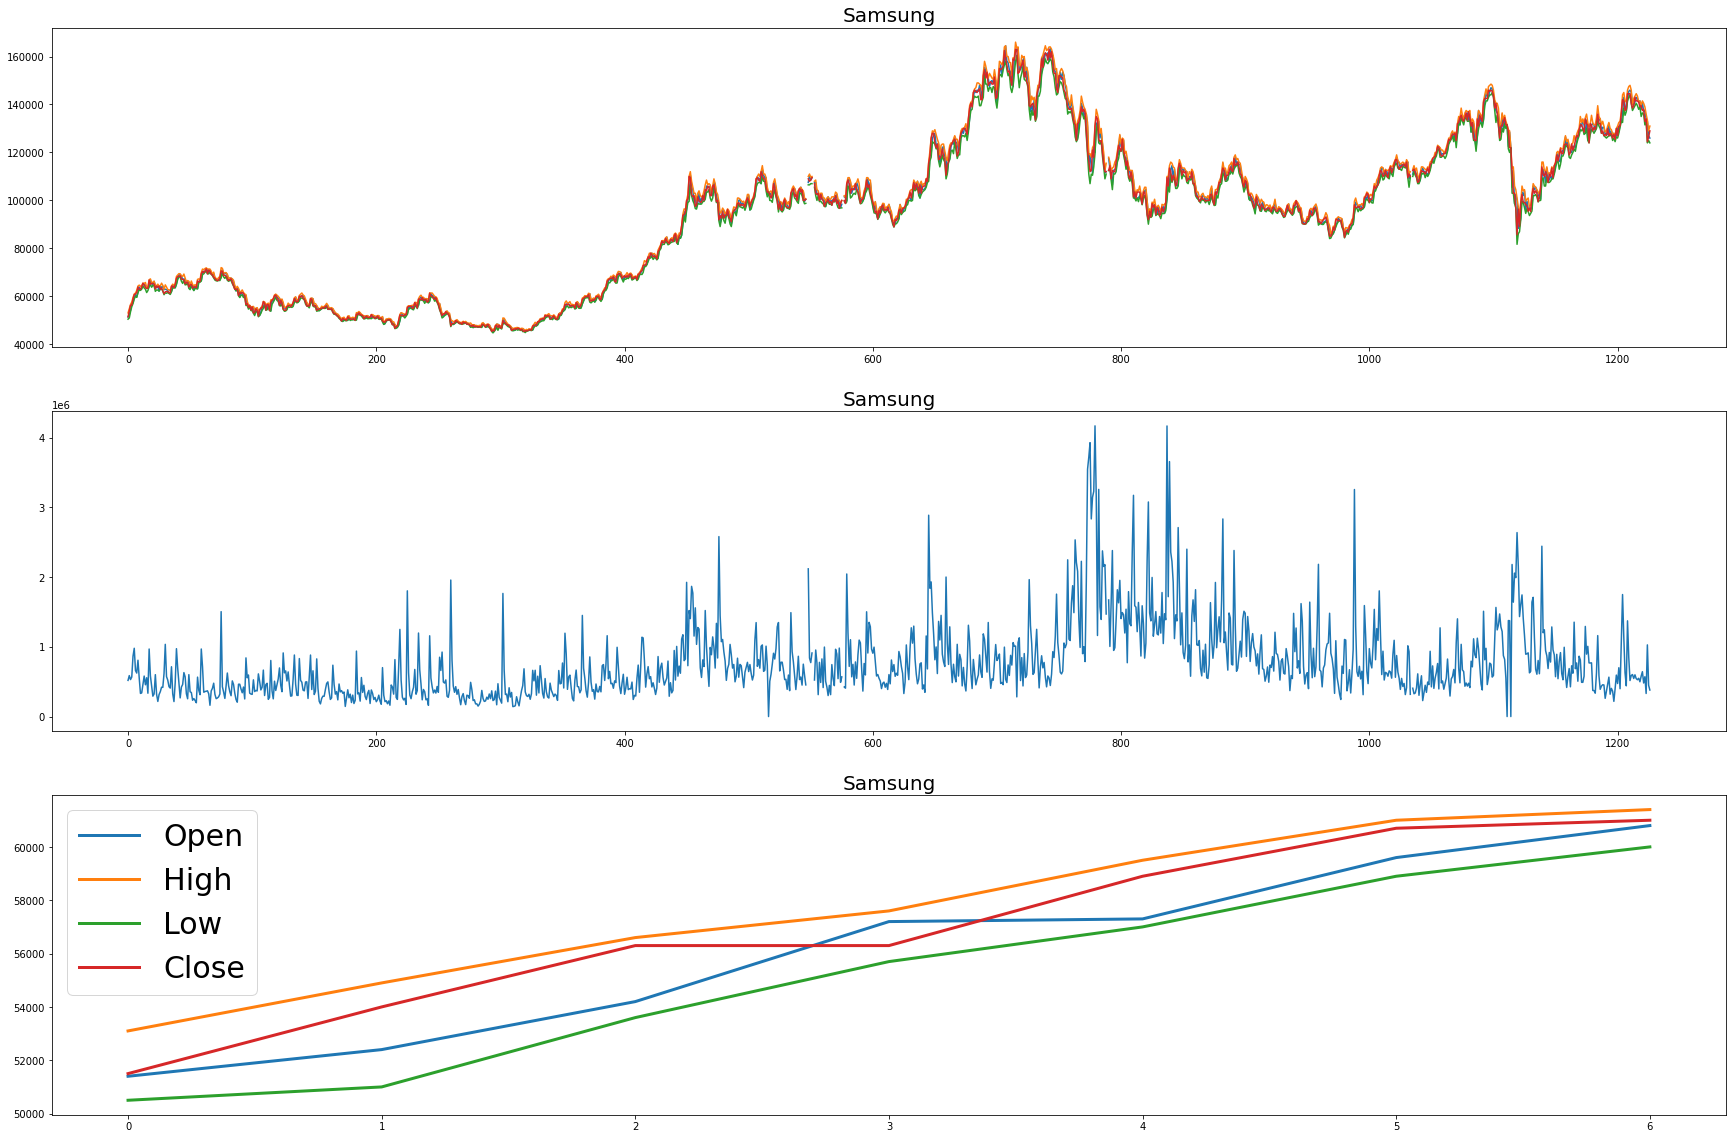

In [ ]:
# 데이터 시각화 
import matplotlib.pyplot as plt 
%matplotlib inline

fig=plt.figure(figsize=(30,20))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
ax1.set_title("Samsung",fontsize=20)
ax1.plot(data['Open'])
ax1.plot(data['High'])
ax1.plot(data['Low'])
ax1.plot(data['Close'])
ax2.set_title("Samsung",fontsize=20)
ax2.plot(data['Volume'])
ax3.set_title("Samsung",fontsize=20)
ax3.plot(data['Open'][0:7], linewidth=3.0,label= "Open")
ax3.plot(data['High'][0:7],  linewidth=3.0 ,label= "High")
ax3.plot(data['Low'][0:7],   linewidth=3.0,label= "Low")
ax3.plot(data['Close'][0:7], linewidth=3.0 ,label= "Close")

ax3.legend(prop={'size': 30})

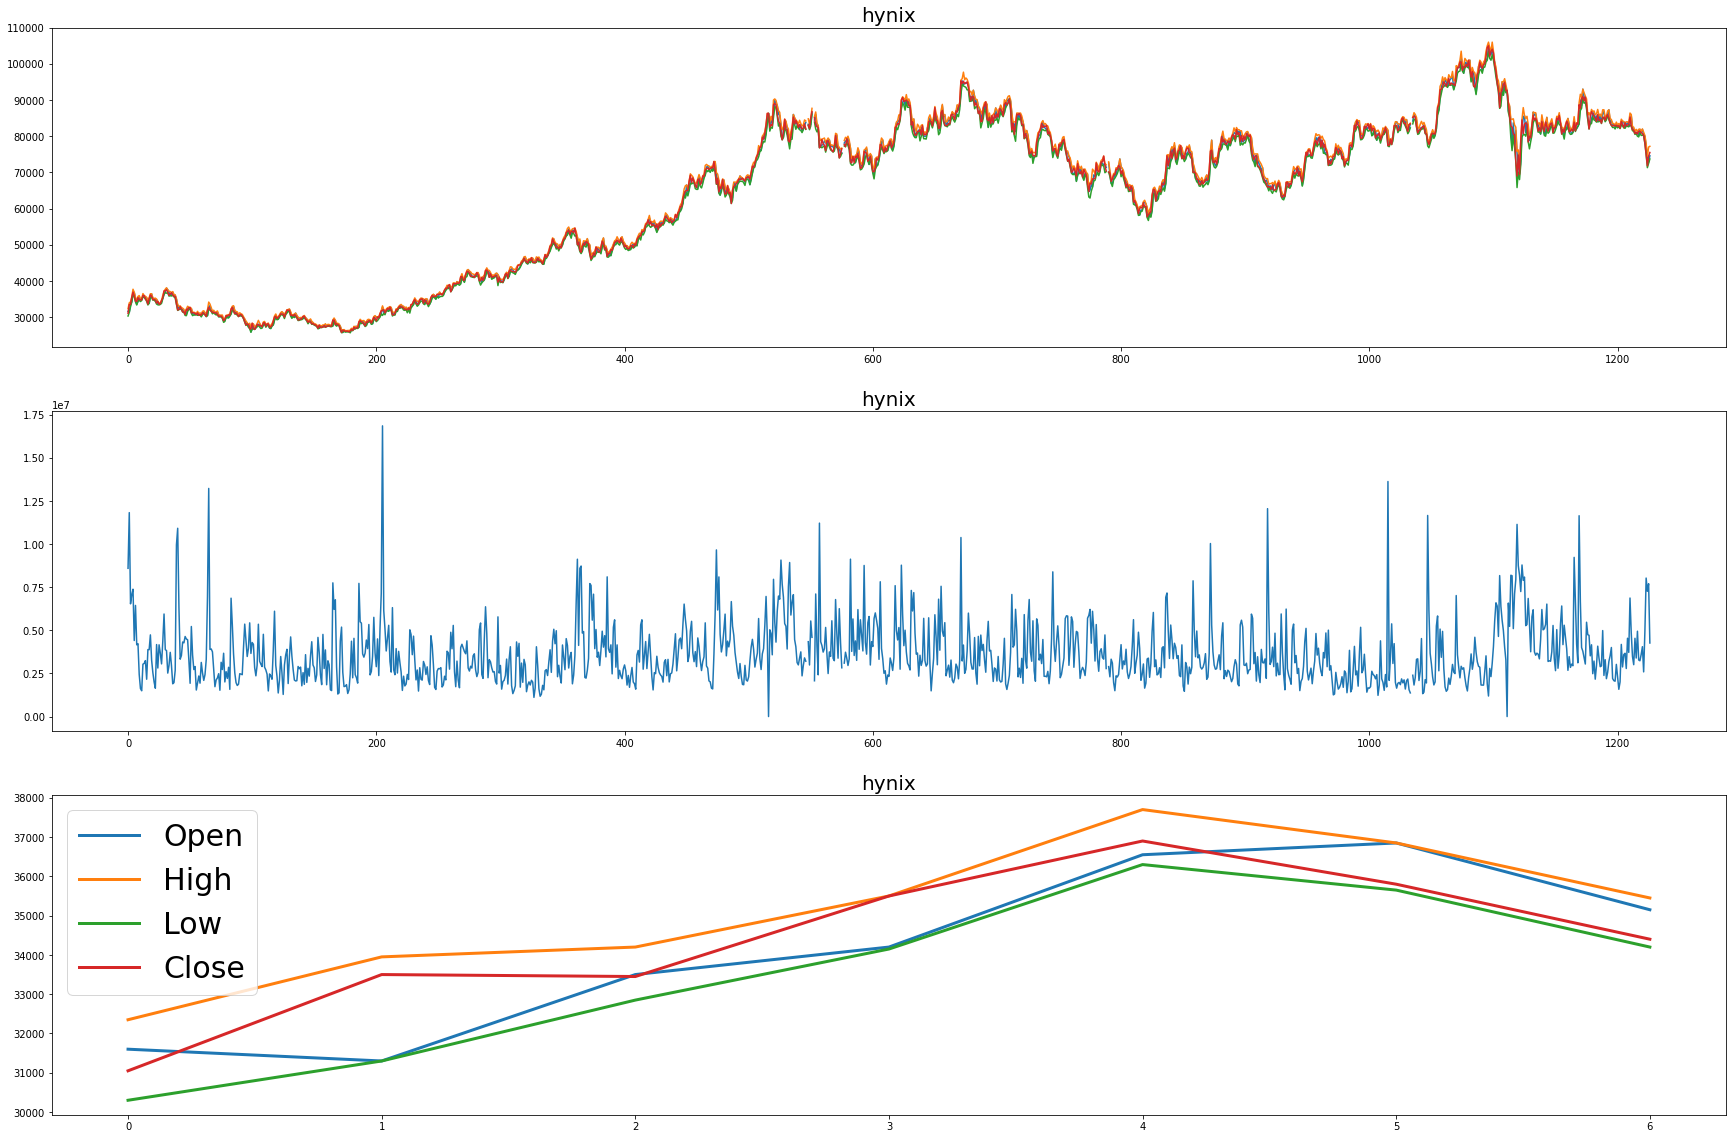

In [ ]:
# 데이터 시각화 
import matplotlib.pyplot as plt 
%matplotlib inline

fig=plt.figure(figsize=(30,20))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)

ax1.set_title("hynix",fontsize=20)
ax1.plot(data1['Open'])
ax1.plot(data1['High'])
ax1.plot(data1['Low'])
ax1.plot(data1['Close'])
ax2.set_title("hynix",fontsize=20)
ax2.plot(data1['Volume'])
ax3.set_title("hynix",fontsize=20)
ax3.plot(data1['Open'][0:7], linewidth=3.0,label= "Open")
ax3.plot(data1['High'][0:7],  linewidth=3.0 ,label= "High")
ax3.plot(data1['Low'][0:7],   linewidth=3.0,label= "Low")
ax3.plot(data1['Close'][0:7], linewidth=3.0 ,label= "Close")


ax3.legend(prop={'size': 30})

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import LSTM, Dropout, Dense, Activation

# LSTM (Long Short Term Memory) 모델 사용

# 인공지능 모델 : 이전 데이터를 이용하여 이후 데이터를 예측하는 인공지능 모델

# from keras.callbacks import TensorBoard, MedelCheckpoint, ReduceLROnPlateau

import datetime

In [ ]:
data = pd.read_csv('009150.KS.csv')

data['High'].fillna(data['High'].mean(), inplace=True) # unique()값으로 조회해 본 결과 데이터 중 nan값이 있었음.

data['Low'].fillna(data['Low'].mean(), inplace=True)

data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-24,51400.0,53100.0,50500.0,51500.0,49681.527344,518793.0
1,2015-08-25,52400.0,54900.0,51000.0,54000.0,52093.250000,587515.0
2,2015-08-26,54200.0,56600.0,53600.0,56300.0,54312.031250,530657.0


In [ ]:
high_prices = data['High'].values

low_prices = data['Low'].values

mid_prices = (high_prices + low_prices)/2 #중간가격 저장

In [ ]:
seq_len = 50 # 최근 50일간의 데이터를 파악하여 미래가격 예측, 50이라는 것이 window 사이즈 (변경 가능)

sequence_length = seq_len + 1 # 50개의 데이터를 보고 51번째를 예측하기 위해 + 1 설정, 한칸씩 밀리면서 윈도우를 만들어간다.

 

result = []

for i in range(len(mid_prices) - sequence_length): # for문을 통해
  result.append(mid_prices[i:i+sequence_length]) # 51개씩 단계별로 윈도우를 result 에 저장

In [ ]:
normalized_data = []

for window in result: #정규화 작업 : 예측률을 높이기 위해 한다.
  normalized_window = [((float(p) / float(window[0]))-1) for p in window]
  normalized_data.append(normalized_window) # 정규화 데이터에 저장
result = np.array(normalized_data)

 

# 트레이닝 데이터와 테스트 데이터를 나눈다.

row = int(round(result.shape[0]*0.9)) # 90% 를 트레이닝 셋으로 나눈다.

train = result[:row,:] # 트레이닝 셋으로 나뉜 결과를 저장

np.random.shuffle(train) # 트레이닝 셋을 random으로 섞어서 해주는게 좋다.(순서대로하면 익숙해질 수 있음)

 

x_train = train[:,:-1]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

y_train = train[:,-1]

 

x_test = result[row:,:-1]

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

y_test = result[row:,-1]

 

x_train.shape, x_test.shape

# ((1059, 50, 1), (118, 50, 1)) --> 1059일의 데이터를 기반으로 118일의 주식 가격을 예측할 것이다.

((1058, 50, 1), (118, 50, 1))

In [ ]:
model = Sequential() # keras.models.Sequential() : 모델을 순차적으로 정의하는 클래스

 

#keras.layers.LSTM() : LSTM 레이어

#LSTM 이라는 모듈이 존재, input은 50개

model.add(LSTM(50, return_sequences=True, input_shape=(50,1))) # 1st LSTM유닛 수 : 50개(숫자 조정 가능 -> 조정해가며 성능 테스트 가능)

 

model.add(LSTM(64, return_sequences=False)) # 2nd LSTM유닛 수 : 64개(숫자 조정 가능 -> 조정해가며 성능 테스트 가능)

 

#keras.layers.Dense() : Fully connected layer

model.add(Dense(1, activation='linear')) # 하루의 데이터를 예측할 것 이기 때문에 1 작성, 작동방법은 선형계획법

 

#mse : Mean Squared Error

model.compile(loss='mse', optimizer='rmsprop')

 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, # 학습을 시키기 위해 fit 메소드 사용(트레이닝셋을 넣어줌)

validation_data=(x_test, y_test), # 검증 데이터에 테스트 데이터를 넣어준다.

batch_size=10, # 한 번에 몇 개씩 묶어서 학습시킬건지 지정

epochs=20) # 20번동안 반복학습을 시킨다.

#실행 시 loss 가 발생하게 되는데, loss가 발생될수록 학습이 잘 되고 있다는 증거가 된다.

# validation loss의 값이 작을수록 학습이 잘 된 것

Epoch 1/20
106/106 [==============================] - 1s 14ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 2/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 3/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/20
106/106 [==============================] - 1s 8ms/step - loss: 9.0417e-04 - val_loss: 8.2526e-04
Epoch 6/20
106/106 [==============================] - 1s 8ms/step - loss: 8.4107e-04 - val_loss: 0.0011
Epoch 7/20
106/106 [==============================] - 1s 8ms/step - loss: 7.4723e-04 - val_loss: 9.1627e-04
Epoch 8/20
106/106 [==============================] - 1s 8ms/step - loss: 7.2010e-04 - val_loss: 6.3403e-04
Epoch 9/20
106/106 [==============================] - 1s 8ms/step - loss: 6.8912e-04 - val_loss: 6.3920e-04
Epoch 10/20
106/106 [==============================] - 1s 8ms/s

In [ ]:
data1 = pd.read_csv('000660.KS (1).csv')

data1['High'].fillna(data1['High'].mean(), inplace=True) # unique()값으로 조회해 본 결과 데이터 중 nan값이 있었음.

data1['Low'].fillna(data1['Low'].mean(), inplace=True)

data1.head(3)

high_prices1 = data1['High'].values

low_prices1 = data1['Low'].values

mid_prices1 = (high_prices1 + low_prices1)/2 #중간가격 저장
seq_len1 = 50 # 최근 50일간의 데이터를 파악하여 미래가격 예측, 50이라는 것이 window 사이즈 (변경 가능)

sequence_length1 = seq_len1 + 1 # 50개의 데이터를 보고 51번째를 예측하기 위해 + 1 설정, 한칸씩 밀리면서 윈도우를 만들어간다.

 

result1 = []

for i in range(len(mid_prices1) - sequence_length1): # for문을 통해
  result1.append(mid_prices1[i:i+sequence_length1]) # 51개씩 단계별로 윈도우를 result 에 저장
  normalized_data1 = []

for window in result1: #정규화 작업 : 예측률을 높이기 위해 한다.
  normalized_window1 = [((float(p) / float(window[0]))-1) for p in window]
  normalized_data1.append(normalized_window1) # 정규화 데이터에 저장
result1 = np.array(normalized_data1)

 

# 트레이닝 데이터와 테스트 데이터를 나눈다.

row1 = int(round(result1.shape[0]*0.9)) # 90% 를 트레이닝 셋으로 나눈다.

train1 = result[:row1,:] # 트레이닝 셋으로 나뉜 결과를 저장

np.random.shuffle(train1) # 트레이닝 셋을 random으로 섞어서 해주는게 좋다.(순서대로하면 익숙해질 수 있음)

 

x_train1 = train1[:,:-1]

x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1],1))

y_train1 = train1[:,-1]

 

x_test1 = result1[row1:,:-1]

x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1],1))

y_test1 = result1[row:,-1]

 

x_train1.shape, x_test1.shape

# ((1059, 50, 1), (118, 50, 1)) --> 1059일의 데이터를 기반으로 118일의 주식 가격을 예측할 것이다.
model1 = Sequential() # keras.models.Sequential() : 모델을 순차적으로 정의하는 클래스

 

#keras.layers.LSTM() : LSTM 레이어

#LSTM 이라는 모듈이 존재, input은 50개

model1.add(LSTM(50, return_sequences=True, input_shape=(50,1))) # 1st LSTM유닛 수 : 50개(숫자 조정 가능 -> 조정해가며 성능 테스트 가능)

 

model1.add(LSTM(64, return_sequences=False)) # 2nd LSTM유닛 수 : 64개(숫자 조정 가능 -> 조정해가며 성능 테스트 가능)

 

#keras.layers.Dense() : Fully connected layer

model1.add(Dense(1, activation='linear')) # 하루의 데이터를 예측할 것 이기 때문에 1 작성, 작동방법은 선형계획법

 

#mse : Mean Squared Error

model1.compile(loss='mse', optimizer='rmsprop')
model1.fit(x_train1, y_train1, # 학습을 시키기 위해 fit 메소드 사용(트레이닝셋을 넣어줌)

validation_data=(x_test1, y_test1), # 검증 데이터에 테스트 데이터를 넣어준다.

batch_size=10, # 한 번에 몇 개씩 묶어서 학습시킬건지 지정

epochs=20) # 20번동안 반복학습을 시킨다.

#실행 시 loss 가 발생하게 되는데, loss가 발생될수록 학습이 잘 되고 있다는 증거가 된다.

# validation loss의 값이 작을수록 학습이 잘 된 것

Epoch 1/20
106/106 [==============================] - 2s 14ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 2/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 3/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0013 - val_loss: 8.4215e-04
Epoch 4/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 7.0974e-04
Epoch 5/20
106/106 [==============================] - 1s 8ms/step - loss: 8.6883e-04 - val_loss: 5.4377e-04
Epoch 6/20
106/106 [==============================] - 1s 8ms/step - loss: 7.9312e-04 - val_loss: 6.1235e-04
Epoch 7/20
106/106 [==============================] - 1s 8ms/step - loss: 7.3934e-04 - val_loss: 4.4708e-04
Epoch 8/20
106/106 [==============================] - 1s 8ms/step - loss: 7.0198e-04 - val_loss: 4.7222e-04
Epoch 9/20
106/106 [==============================] - 1s 8ms/step - loss: 6.7473e-04 - val_loss: 4.5593e-04
Epoch 10/20
106/106 [==============================

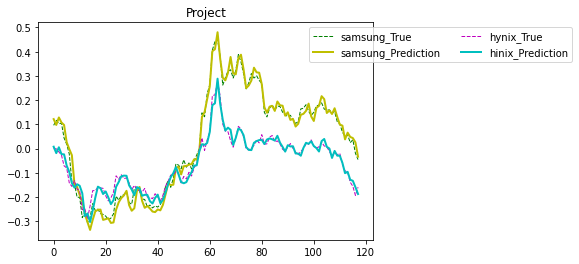

In [ ]:
#삼성전자
pred = model.predict(x_test)
pred1 = model.predict(x_test1)
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='samsung_True',linewidth=1.0,color='g',linestyle = '--',alpha = 1)
ax.plot(pred,label='samsung_Prediction',linewidth=2.0,color='y' )
ax.plot(y_test1, label='hynix_True',linewidth=1.0,color='m',linestyle = '--',alpha =1)
ax.plot(pred1, label='hinix_Prediction',linewidth=2.0,color='c' )
ax.set_title("Project")
ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(1.2, 1))
plt.show()

In [ ]:
print(ax.get_xlim())
print(ax.get_ylim())

(-5.8500000000000005, 122.85)
(-0.37605712115764617, 0.5209719866514206)
